In [286]:
print(joblib.__version__)

1.4.2


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 아이오와 주택 데이터 설명

### 1. **기본 정보**
* Id: 고유 식별자 (각 주택의 고유 번호)
* MSSubClass: 주택 유형
  * 20: 1층 1946 이후 건축
  * 30: 1층 1945 이전 건축
  * 40: 1층 마감되지 않은 모든 연도
  * 45: 1.5층 마감되지 않은 모든 연도
  * 50: 1.5층 마감된 모든 연도
  * 60: 2층 1946 이후 건축
  * 70: 2층 1945 이전 건축
  * 75: 2.5층 모든 연도
  * 80: 스플릿 또는 멀티레벨
  * 85: 스플릿 포이어
  * 90: 듀플렉스 - 모든 스타일과 연도
  * 120: 1층 PUD (계획 단위 개발) - 1946 이후 건축
  * 150: 1.5층 PUD - 모든 연도
  * 160: 2층 PUD - 1946 이후 건축
  * 180: PUD - 멀티레벨 - 인클라인
  * 190: 2층 PUD - 1945 이전 건축
* MSZoning: 주택 구역
  * RL: 주거용 저밀도
  * RM: 주거용 중밀도
  * C (all): 상업용
  * FV: 주거용 고밀도
  * RH: 주거용 고밀도
* LotFrontage: 거리와 접한 면적 (피트 단위)
* LotArea: 부지 면적 (평방 피트)
* Street: 도로 유형
  * Pave: 포장도로
  * Grvl: 자갈도로
  * Alley: 골목 접근 유형
  * Grvl: 자갈
  * Pave: 포장
  * NA: 없음
* LotShape: 부지 형태
* Reg: 정규형
  * IR1: 약간 불규칙형
  * IR2: 중간 불규칙형
  * IR3: 매우 불규칙형
* LandContour: 토지 윤곽
  * Lvl: 평지
  * Bnk: 경사면
  * HLS: 언덕
  * Low: 저지대
* Utilities: 유틸리티 유형
  * AllPub: 모든 공공 서비스
  * NoSewr: 하수도 없음
  * NoSeWa: 하수도 및 물 없음
  * ELO: 전기만
* LotConfig: 부지 구성
  * Inside: 내부
  * Corner: 코너
  * CulDSac: 막다른 길
  * FR2: 2면 도로
  * FR3: 3면 도로
* LandSlope: 토지 경사도
  * Gtl: 완만
  * Mod: 보통
  * Sev: 심함
* Neighborhood: 인근 지역
  * CollgCr: College Creek
  * Veenker: Veenker
  * Crawfor: Crawford
  * NoRidge: North Ridge
  * Mitchel: Mitchell
  * Somerst: Somerset
  * NWAmes: Northwest Ames
  * OldTown: Old Town
  * BrkSide: Brookside
  * Sawyer: Sawyer
  * NridgHt: Northridge Heights
  * IDOTRR: Iowa DOT and Rail Road
  * MeadowV: Meadow Village
  * Edwards: Edwards
  * Timber: Timberland
  * Gilbert: Gilbert
  * StoneBr: Stone Brook
  * ClearCr: Clear Creek
  * NPkVill: Northpark Villa
  * Blueste: Bluestem
  * SawyerW: Sawyer West
  * Greens: Greens
  * GrnHill: Green Hills
  * Landmrk: Landmarks
* Condition1: 주요 도로 또는 철도 근접도
  * Norm: 정상
  * Feedr: 피더 도로
  * Artery: 주요 도로
  * RRAe: 철도 인접 (동쪽)
  * RRAn: 철도 인접 (북쪽)
  * PosN: 양호 (북쪽)
  * PosA: 양호 (동쪽)
  * RRNe: 철도 인접 (북동쪽)
  * RRnN: 철도 인접 (북쪽)
* Condition2: 주요 도로 또는 철도 근접도
  * Norm: 정상
  * Feedr: 피더 도로
  * Artery: 주요 도로
  * RRAe: 철도 인접 (동쪽)
  * RRAn: 철도 인접 (북쪽)
  * PosN: 양호 (북쪽)
  * PosA: 양호 (동쪽)
  * RRNe: 철도 인접 (북동쪽)
  * RRnN: 철도 인접 (북쪽)
* BldgType: 건물 유형
  * 1Fam: 단독 주택
  * 2fmCon: 2가구 주택
  * Duplex: 듀플렉스
  * TwnhsE: 타운하우스 (끝)
  * TwnhsI: 타운하우스 (내부)
* HouseStyle: 주택 스타일
  * 1Story: 1층
  * 1.5Fin: 1.5층 마감
  * 1.5Unf: 1.5층 미마감
  * 2Story: 2층
  * 2.5Fin: 2.5층 마감
  * 2.5Unf: 2.5층 미마감
  * SFoyer: 스플릿 포이어
  * SLvl: 스플릿 레벨
* OverallQual: 전체 재료 및 마감 품질 (1~10 등급)
* OverallCond: 전체 상태 (1~10 등급)
* YearBuilt: 건축 연도
* YearRemodAdd: 리모델링 연도
  * RoofStyle: 지붕 스타일
  * Flat: 평지붕
  * Gable: 박공
  * Gambrel: 갬브렐
  * Hip: 힙
  * Mansard: 맨사드
  * Shed: 셰드
  * RoofMatl: 지붕 재료
  * ClyTile: 점토 타일
  * CompShg: 복합 아스팔트
  * Membran: 멤브레인
  * Metal: 금속
  * Roll: 롤
  * Tar&Grv: 타르 및 자갈
  * WdShake: 목재 쉐이크
  * WdShngl: 목재 싱글
* Exterior1st: 외부 마감재 1
  * AsbShng: 아스베스트 쉐이크
  * AsphShn: 아스팔트 쉐이크
  * BrkComm: 벽돌 커먼
  * BrkFace: 벽돌 페이스
  * CBlock: 콘크리트 블록
  * CemntBd: 시멘트 보드
  * HdBoard: 하드보드
  * ImStucc: 인조 스터코
  * MetalSd: 금속 사이딩
  * Other: 기타
  * Plywood: 합판
  * PreCast: 프리캐스트
  * Stone: 돌
  * Stucco: 스터코
  * VinylSd: 비닐 사이딩
  * Wd Sdng: 목재 사이딩
  * WdShing: 목재 쉐이크
* Exterior2nd: 외부 마감재 2
  * AsbShng: 아스베스트 쉐이크
  * AsphShn: 아스팔트 쉐이크
  * BrkComm: 벽돌 커먼
  * BrkFace: 벽돌 페이스
  * CBlock: 콘크리트 블록
  * CemntBd: 시멘트 보드
  * HdBoard: 하드보드
  * ImStucc: 인조 스터코
  * MetalSd: 금속 사이딩
  * Other: 기타
  * Plywood: 합판
  * PreCast: 프리캐스트
  * Stone: 돌
  * Stucco: 스터코
  * VinylSd: 비닐 사이딩
  * Wd Sdng: 목재 사이딩
  * WdShing: 목재 쉐이크
* MasVnrType: 외장 벽 마감재 유형
  * BrkCmn: 일반 벽돌
  * BrkFace: 벽돌 페이스
  * CBlock: 콘크리트 블록
  * None: 없음
  * Stone: 돌
* MasVnrArea: 외장 벽 마감재 면적 (평방 피트)
* ExterQual: 외부 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* Ex terCond: 외부 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* Foundation: 기초 유형
  * BrkTil: 벽돌 타일
  * CBlock: 콘크리트 블록
  * PConc: 콘크리트
  * Slab: 슬래브
  * Stone: 돌
  * Wood: 목재
* BsmtQual: 지하실 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* BsmtCond: 지하실 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* Bs mtExposure: 지하실 노출 정도
  * Gd: 좋음
  * Av: 평균
  * Mn: 최소
  * No: 없음
  * NA: 없음
* BsmtFinType1: 지하실 마감 유형 1
  * GLQ: 좋은 생활 공간
  * ALQ: 평균 생활 공간
  * BLQ: 저급 생활 공간
  * Rec: 레크리에이션 공간
  * LwQ: 저품질
  * Unf: 미마감
  * NA: 없음
* BsmtFinSF1: 지하 마감 면적 1 (평방 피트)
* BsmtFinType2: 지하실 마감 유형 2
  * GLQ: 좋은 생활 공간
  * ALQ: 평균 생활 공간
  * BLQ: 저급 생활 공간
  * Rec: 레크리에이션 공간
  * LwQ: 저품질
  * Unf: 미마감
  * NA: 없음
* BsmtFinSF2: 지하 마감 면적 2 (평방 피트)
* BsmtUnfSF: 지하 미마감 면적 (평방 피트)
* TotalBsmtSF: 지하 전체 면적 (평방 피트)
* Heating: 난방 유형
  * Floor: 바닥 난방
  * GasA: 가스 에어
  * GasW: 가스 물
  * Grav: 중력
  * OthW: 기타 물
  * Wall: 벽 난방
* HeatingQC: 난방 품질 및 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* CentralAir: 중앙 에어컨 여부
  * Y: 있음
  * N: 없음
* Electrical: 전기 시스템
  * SBrkr: 서킷 브레이커
  * FuseA: 퓨즈 A
  * FuseF: 퓨즈 F
  * FuseP: 퓨즈 P
  * Mix: 혼합
* 1stFlrSF: 1층 면적 (평방 피트)
* 2ndFlrSF: 2층 면적 (평방 피트)
* LowQualFinSF: 저품질 마감 면적 (평방 피트)
* GrLivArea: 지상 생활 면적 (평방 피트)
* BsmtFullBath: 지하 전체 욕실 개수
* BsmtHalfBath: 지하 반 욕실 개수
* FullBath: 지상 전체 욕실 개수
* HalfBath: 지상 반 욕실 개수
* BedroomAbvGr: 지상 침실 개수
* KitchenAbvGr: 지상 주방 개수
* KitchenQual: 주방 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* TotRmsAbvGrd: 지상 총 방 개수 (욕실 제외)
* Functional: 주택 기능성
  * Typ: 일반
  * Min1: 경미한 결함
  * Min2: 경미한 결함 2
  * Mod: 보통 결함
  * Maj1: 주요 결함 1
  * Maj2: 주요 결함 2
  * Sev: 심각한 결함
  * Sal: 판매 불가
* Fireplaces: 벽난로 개수
* FireplaceQu: 벽난로 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* GarageType: 차고 유형
  * 2Types: 2가지 유형
  * Attchd: 부착형
  * Basment: 지하
  * BuiltIn: 내장형
  * CarPort: 카포트
  * Detchd: 분리형
  * NA: 없음
* GarageYrBlt: 차고 건축 연도
* GarageFinish: 차고 내부 마감 상태
  * Fin: 마감
  * RFn: 부분 마감
  * Unf: 미마감
  * NA: 없음
* GarageCars: 차고에 주차 가능한 차량 수
* GarageArea: 차고 면적 (평방 피트)
* GarageQual: 차고 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* GarageCond: 차고 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* PavedDrive: 포장된 진입로 여부
  * Y: 있음
  * P: 부분
  * N: 없음
* WoodDeckSF: 목재 데크 면적 (평방 피트)
* OpenPorchSF: 개방형 현관 면적 (평방 피트)
* EnclosedPorch: 폐쇄형 현관 면적 (평방 피트)
* 3SsnPorch: 3계절 현관 면적 (평방 피트)
* ScreenPorch: 스크린 현관 면적 (평방 피트)
* PoolArea: 수영장 면적 (평방 피트)
* PoolQC: 수영장 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * NA: 없음
* Fence: 울타리 품질
  * GdPrv: 좋은 사생활
  * MnPrv: 보통 사생활
  * GdWo: 좋은 목재
  * MnWw: 보통 목재
  * NA: 없음
* MiscFeature: 기타 기능
  * Elev: 엘리베이터
  * Gar2: 2차 차고
  * Othr: 기타
  * Shed: 창고
  * TenC: 테니스 코트
  * NA: 없음
* MiscVal: 기타 기능의 가치 (달러)
* MoSold: 판매 월
* YrSold: 판매 연도
* SaleType: 판매 유형
  * WD: 보증 증서
  * CWD: 보증 증서 및 특별 보증
  * VWD: 보증 증서 및 특별 보증
  * New: 신축
  * COD: 현금 거래
  * Con: 계약
  * SaleType: 판매 유형
  * WD: 보증 증서
  * CWD: 보증 증서 및 특별 보증
  * VWD: 보증 증서 및 특별 보증
  * New: 신축
  * COD: 현금 거래
  * Con: 계약
  * ConLw: 계약 저가
  * ConLI: 계약 저가 (개인)
  * ConLD: 계약 저가 (개발자)
  * Oth: 기타
* SaleCondition: 판매 조건
  * Normal: 정상
  * Abnorml: 비정상
  * AdjLand: 인접 토지
  * Alloca: 할당
  * Family: 가족
  * Partial: 부분
* SalePrice: 판매 가격 (목표 변수)

In [244]:
data = pd.read_csv("../06machine_learning/data/house_train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [245]:
# 컬럼 표시 수 설정하기
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [246]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [247]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [248]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'Electrical',
       'Id', 'Functional', 'Fireplaces', 'KitchenQual', 'KitchenAbvGr',
       'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd',
       'GarageCars', 'GrLivArea', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'BsmtFullBath', 'HeatingQC', 'LowQualFinSF', 'LandSlope', 'OverallQual',
       'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood',
       'LotConfig', 'YearBuilt', 'Utilities', 'LandContour', 'LotShape',
       'Street', 'LotArea', 'MSZoning', 'OverallCond', 'YearRemodAdd',
       '2ndFlrSF', 'BsmtFinSF2', '1stF

In [249]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [250]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
KitchenQual       0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Id                0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
3SsnPorch         0.000000
2ndFlrSF          0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
W

In [251]:
data = data.drop(["FireplaceQu", "Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [252]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtFinType1      2.534247
BsmtCond          2.534247
MasVnrArea        0.547945
Electrical        0.068493
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
Functional        0.000000
MSSubClass        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
3SsnPorch         0.000000
2ndFlrSF          0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
P

In [253]:
missing_cols = ['LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType1', 'BsmtCond', 'MasVnrArea', 'Electrical']

In [254]:
for col in missing_cols:
    print(col, data[col].dtype)
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else: 
        data[col] = data[col].fillna(data[col].median())
    

LotFrontage float64
GarageYrBlt float64
GarageCond object
GarageType object
GarageFinish object
GarageQual object
BsmtFinType2 object
BsmtExposure object
BsmtQual object
BsmtFinType1 object
BsmtCond object
MasVnrArea float64
Electrical object


In [255]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

# 많은 컬럼 중 어떤 컬럼을 골라야 할까?
* 컬럼의 상관분석을 통해 타겟변수(종속변수)와 상관도가 높은 컬럼만 선택
* 트리계열의 알고리즘을 사용해 선분석 후 중요 변수만 추출해서 재분석

In [256]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [257]:
data2 = data.copy()

In [285]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# 상관분석을 통해 종속변수와 관련 높은 변수 선택 후 분석

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [259]:
data = pd.get_dummies(data)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [260]:
corr_rate = data.corr(method='spearman').sort_values(by='SalePrice', ascending=False)['SalePrice']

In [261]:
corr_rate.head(15)

SalePrice           1.000000
OverallQual         0.809829
GrLivArea           0.731310
GarageCars          0.690711
YearBuilt           0.652682
GarageArea          0.649379
FullBath            0.635957
TotalBsmtSF         0.602725
1stFlrSF            0.575408
ExterQual_Gd        0.574642
YearRemodAdd        0.571159
GarageYrBlt         0.563256
Foundation_PConc    0.562287
TotRmsAbvGrd        0.532586
Fireplaces          0.519247
Name: SalePrice, dtype: float64

In [262]:
new_cols1 = corr_rate.head(15).index

In [263]:
corr_rate.tail(100)

SaleType_ConLD          -0.044713
SaleType_Oth            -0.044950
Street_Grvl             -0.045814
Neighborhood_Mitchel    -0.046305
Exterior2nd_Brk Cmn     -0.047830
Exterior2nd_Stucco      -0.049140
Condition2_Artery       -0.049343
Condition2_RRNn         -0.049761
SaleCondition_Family    -0.049906
LandSlope_Gtl           -0.050034
Condition1_RRAe         -0.050865
BsmtFinType2_BLQ        -0.053089
GarageQual_Po           -0.057941
ExterCond_Gd            -0.058472
Electrical_FuseP        -0.059844
Condition2_Feedr        -0.059951
Exterior2nd_HdBoard     -0.061353
Exterior1st_BrkComm     -0.061646
BsmtCond_Po             -0.062679
MiscVal                 -0.062727
Neighborhood_SWISU      -0.064570
Functional_Min1         -0.066816
LowQualFinSF            -0.067719
SaleCondition_AdjLand   -0.067949
Exterior2nd_Wd Shng     -0.068178
MSZoning_RH             -0.074084
HouseStyle_1Story       -0.078627
Functional_Min2         -0.078754
Exterior1st_WdShing     -0.079073
Heating_Wall  

In [264]:
new_cols2 = corr_rate.tail(4).index

In [265]:
list(new_cols1) + list(new_cols2)

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_Gd',
 'YearRemodAdd',
 'GarageYrBlt',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'Fireplaces',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'GarageFinish_Unf',
 'ExterQual_TA']

In [266]:
data = data[list(new_cols1) + list(new_cols2)]
data

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
0,208500,7,1710,2,2003,548,2,856,856,True,2003,2003.0,True,8,0,False,False,False,False
1,181500,6,1262,2,1976,460,2,1262,1262,False,1976,1976.0,False,6,1,True,False,False,True
2,223500,7,1786,2,2001,608,2,920,920,True,2002,2001.0,True,6,1,False,False,False,False
3,140000,7,1717,3,1915,642,1,756,961,False,1970,1998.0,False,7,1,False,True,True,True
4,250000,8,2198,3,2000,836,2,1145,1145,True,2000,2000.0,True,9,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,1999,460,2,953,953,False,2000,1999.0,True,7,1,True,False,False,True
1456,210000,6,2073,2,1978,500,2,1542,2073,False,1988,1978.0,False,7,2,True,False,True,True
1457,266500,7,2340,1,1941,252,2,1152,1188,False,2006,1941.0,False,9,2,False,True,False,False
1458,142125,5,1078,1,1950,240,1,1078,1078,False,1996,1950.0,False,5,0,False,True,True,True


In [267]:
data.corr(method='spearman').sort_values(by='SalePrice', ascending=False)

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
SalePrice,1.000000,0.809829,0.731310,0.690711,0.652682,0.649379,0.635957,0.602725,0.575408,0.574642,0.571159,0.563256,0.562287,0.532586,0.519247,-0.581803,-0.583512,-0.620915,-0.637785
OverallQual,0.809829,1.000000,0.603262,0.608756,0.647392,0.541552,0.576372,0.459915,0.408730,0.603276,0.557723,0.592010,0.586764,0.427806,0.420626,-0.581192,-0.590344,-0.556712,-0.673842
GrLivArea,0.731310,0.603262,1.000000,0.505094,0.288493,0.468211,0.658419,0.371026,0.494421,0.358133,0.282400,0.274625,0.332373,0.827874,0.480804,-0.376159,-0.338674,-0.362334,-0.413922
GarageCars,0.690711,0.608756,0.505094,1.000000,0.601519,0.853317,0.518310,0.455508,0.450580,0.443029,0.456245,0.564786,0.480178,0.386244,0.325520,-0.423255,-0.504415,-0.489950,-0.506121
YearBuilt,0.652682,0.647392,0.288493,0.601519,1.000000,0.528281,0.537420,0.427187,0.293363,0.593575,0.684388,0.845595,0.704001,0.176820,0.174655,-0.512248,-0.700552,-0.632360,-0.644772
GarageArea,0.649379,0.541552,0.468211,0.853317,0.528281,1.000000,0.444459,0.486685,0.489797,0.389859,0.398267,0.540450,0.400205,0.330549,0.264543,-0.393538,-0.413167,-0.449457,-0.453014
FullBath,0.635957,0.576372,0.658419,0.518310,0.537420,0.444459,1.000000,0.328036,0.366891,0.449973,0.431390,0.524892,0.480765,0.558665,0.268548,-0.430333,-0.513693,-0.450629,-0.485598
TotalBsmtSF,0.602725,0.459915,0.371026,0.455508,0.427187,0.486685,0.328036,1.000000,0.829292,0.313044,0.299042,0.319936,0.296406,0.233913,0.325687,-0.307764,-0.317195,-0.385379,-0.383999
1stFlrSF,0.575408,0.408730,0.494421,0.450580,0.293363,0.489797,0.366891,0.829292,1.000000,0.225259,0.240265,0.214327,0.179926,0.361777,0.394883,-0.268281,-0.215559,-0.326525,-0.294636
ExterQual_Gd,0.574642,0.603276,0.358133,0.443029,0.593575,0.389859,0.449973,0.313044,0.225259,1.000000,0.532550,0.569570,0.586748,0.212665,0.181413,-0.617598,-0.541969,-0.483784,-0.906121


<Axes: >

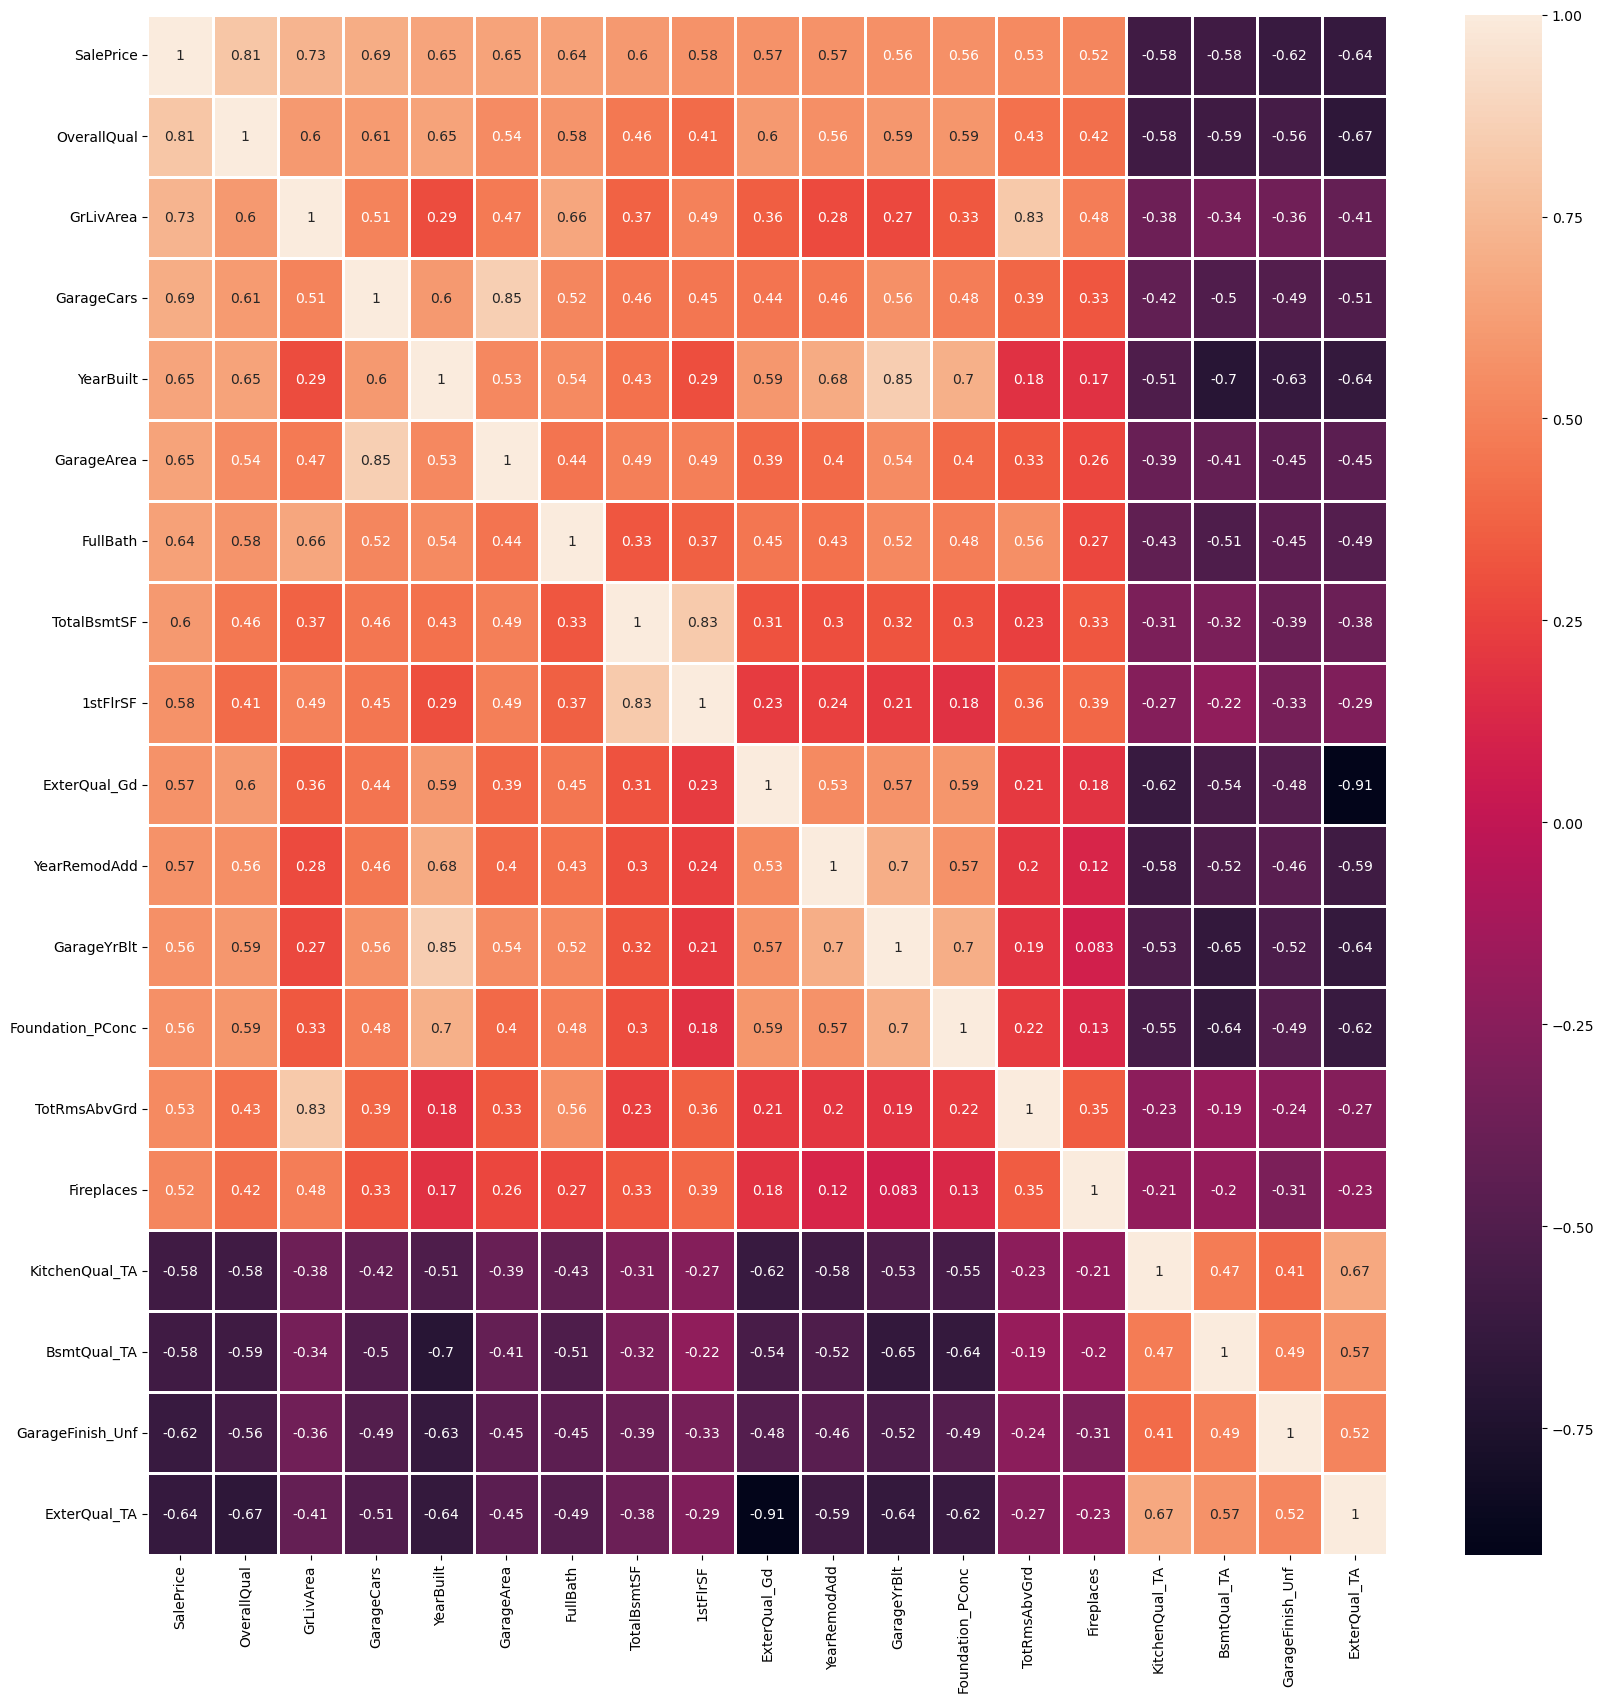

In [268]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(method='spearman').sort_values(by='SalePrice', ascending=False), annot=True, linewidth=1)

* ExterQual_TA - ExterQal_gd -0.91
* yearBuilt - BsmtQual_TA -0.7
* yearBuilt - GarageYrBlt - 0.85
* yearBuilt - Foundation_PConc - 0.7
* TotRmsAbvGrd - GrLivArea 0.83
* garagecars - garageArea 0.85

제거 대상 컬럼 TotRmsAbvGrd, GarageArea, Foundation_PConc, BsmtQual_TA, GarageYrBlt 

In [269]:
data.corr(method='spearman').sort_values(by='SalePrice', ascending=False)['SalePrice']

SalePrice           1.000000
OverallQual         0.809829
GrLivArea           0.731310
GarageCars          0.690711
YearBuilt           0.652682
GarageArea          0.649379
FullBath            0.635957
TotalBsmtSF         0.602725
1stFlrSF            0.575408
ExterQual_Gd        0.574642
YearRemodAdd        0.571159
GarageYrBlt         0.563256
Foundation_PConc    0.562287
TotRmsAbvGrd        0.532586
Fireplaces          0.519247
KitchenQual_TA     -0.581803
BsmtQual_TA        -0.583512
GarageFinish_Unf   -0.620915
ExterQual_TA       -0.637785
Name: SalePrice, dtype: float64

In [270]:
data = data.drop(['TotRmsAbvGrd', 'GarageArea', 'Foundation_PConc', 'BsmtQual_TA', 'GarageYrBlt'], axis=1)
data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,208500,7,1710,2,2003,2,856,856,True,2003,0,False,False,False
1,181500,6,1262,2,1976,2,1262,1262,False,1976,1,True,False,True
2,223500,7,1786,2,2001,2,920,920,True,2002,1,False,False,False
3,140000,7,1717,3,1915,1,756,961,False,1970,1,False,True,True
4,250000,8,2198,3,2000,2,1145,1145,True,2000,1,False,False,False


In [271]:
X = data.drop("SalePrice", axis=1)
y = data['SalePrice']

In [272]:
X

,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,7,1710,2,2003,2,856,856,True,2003,0,False,False,False
1,6,1262,2,1976,2,1262,1262,False,1976,1,True,False,True
2,7,1786,2,2001,2,920,920,True,2002,1,False,False,False
3,7,1717,3,1915,1,756,961,False,1970,1,False,True,True
4,8,2198,3,2000,2,1145,1145,True,2000,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,1999,2,953,953,False,2000,1,True,False,True
1456,6,2073,2,1978,2,1542,2073,False,1988,2,True,True,True
1457,7,2340,1,1941,2,1152,1188,False,2006,2,False,False,False
1458,5,1078,1,1950,1,1078,1078,False,1996,0,False,True,True


<Axes: >

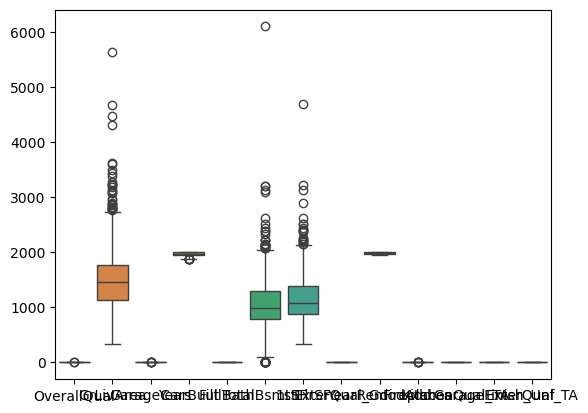

In [273]:
sns.boxplot(X)

In [274]:
from sklearn.preprocessing import RobustScaler

In [275]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd', 'YearRemodAdd', 'Fireplaces',
       'KitchenQual_TA', 'GarageFinish_Unf', 'ExterQual_TA'],
      dtype='object')

In [276]:
import joblib

In [277]:
rs = RobustScaler()
rs.fit(X)
X_scaled = rs.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,0.5,0.380070,0.0,0.652174,0.0,-0.269652,-0.453608,1.0,0.243243,-1.0,-1.0,0.0,-1.0
1,0.0,-0.312090,0.0,0.065217,0.0,0.538308,0.343643,0.0,-0.486486,0.0,0.0,0.0,0.0
2,0.5,0.497489,0.0,0.608696,0.0,-0.142289,-0.327933,1.0,0.216216,0.0,-1.0,0.0,-1.0
3,0.5,0.390885,1.0,-1.260870,-1.0,-0.468657,-0.247423,0.0,-0.648649,0.0,-1.0,1.0,0.0
4,1.0,1.134029,1.0,0.586957,0.0,0.305473,0.113893,1.0,0.162162,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.282735,0.0,0.565217,0.0,-0.076617,-0.263132,0.0,0.162162,0.0,0.0,0.0,0.0
1456,0.0,0.940904,0.0,0.108696,0.0,1.095522,1.936181,0.0,-0.162162,1.0,0.0,1.0,0.0
1457,0.5,1.353418,-1.0,-0.695652,0.0,0.319403,0.198331,0.0,0.324324,1.0,-1.0,0.0,-1.0
1458,-0.5,-0.596369,-1.0,-0.500000,-1.0,0.172139,-0.017673,0.0,0.054054,-1.0,-1.0,1.0,0.0


# joblib으로 스케일러 저장하기

In [278]:
joblib.dump(rs, './model/iowa_robustscaler.joblib')

['./model/iowa_robustscaler.joblib']

In [287]:
X_scaled.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd', 'YearRemodAdd', 'Fireplaces',
       'KitchenQual_TA', 'GarageFinish_Unf', 'ExterQual_TA'],
      dtype='object')

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

In [281]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [282]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                448       
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [283]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=20)
modelpath = "./model/iowa_house{epoch:03d}__{val_loss:.4f}.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, validation_data=(X_test, y_test),  callbacks=[early_stop, checkpoint])

Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 39644897280.0000

2024-09-11 16:28:33.917457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 16:28:33.976806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 16:28:33.976929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 62ms/step - loss: 39644897280.0000 - val_loss: 37625647104.0000
Epoch 2/2000
5/6 [========================>.....] - ETA: 0s - loss: 39809933312.0000

2024-09-11 16:28:34.195735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 16:28:34.219366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 16:28:34.219473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 44ms/step - loss: 39644733440.0000 - val_loss: 37625475072.0000
Epoch 3/2000
6/6 [==============================] - 0s 42ms/step - loss: 39644549120.0000 - val_loss: 37625266176.0000
Epoch 4/2000
6/6 [==============================] - 0s 38ms/step - loss: 39644299264.0000 - val_loss: 37624975360.0000
Epoch 5/2000
6/6 [==============================] - 0s 39ms/step - loss: 39643963392.0000 - val_loss: 37624573952.0000
Epoch 6/2000
6/6 [==============================] - 0s 39ms/step - loss: 39643480064.0000 - val_loss: 37624016896.0000
Epoch 7/2000
6/6 [==============================] - 0s 39ms/step - loss: 39642824704.0000 - val_loss: 37623230464.0000
Epoch 8/2000
6/6 [==============================] - 0s 39ms/step - loss: 39641890816.0000 - val_loss: 37622124544.0000
Epoch 9/2000
6/6 [==============================] - 0s 39ms/step - loss: 39640596480.0000 - val_loss: 37620588544.0000
Epoch 10/2000
6/6 [==============================] - 0s 34ms/

6/6 [==============================] - 0s 39ms/step - loss: 14538054656.0000 - val_loss: 13233570816.0000
Epoch 71/2000
6/6 [==============================] - 0s 37ms/step - loss: 13641922560.0000 - val_loss: 12401258496.0000
Epoch 72/2000
6/6 [==============================] - 0s 38ms/step - loss: 12807777280.0000 - val_loss: 11590029312.0000
Epoch 73/2000
6/6 [==============================] - 0s 38ms/step - loss: 11973139456.0000 - val_loss: 10829333504.0000
Epoch 74/2000
6/6 [==============================] - 0s 36ms/step - loss: 11206821888.0000 - val_loss: 10104588288.0000
Epoch 75/2000
6/6 [==============================] - 0s 38ms/step - loss: 10477832192.0000 - val_loss: 9433962496.0000
Epoch 76/2000
6/6 [==============================] - 0s 64ms/step - loss: 9818972160.0000 - val_loss: 8805456896.0000
Epoch 77/2000
6/6 [==============================] - 0s 44ms/step - loss: 9182271488.0000 - val_loss: 8216884736.0000
Epoch 78/2000
6/6 [==============================] - 0s 39m

6/6 [==============================] - 0s 38ms/step - loss: 4012770816.0000 - val_loss: 3394059520.0000
Epoch 140/2000
6/6 [==============================] - 0s 25ms/step - loss: 4003089408.0000 - val_loss: 3400577536.0000
Epoch 141/2000
6/6 [==============================] - 0s 25ms/step - loss: 3995521280.0000 - val_loss: 3399243264.0000
Epoch 142/2000
6/6 [==============================] - 0s 38ms/step - loss: 3988053760.0000 - val_loss: 3391625472.0000
Epoch 143/2000
6/6 [==============================] - 0s 36ms/step - loss: 3977956352.0000 - val_loss: 3379800576.0000
Epoch 144/2000
6/6 [==============================] - 0s 37ms/step - loss: 3966860288.0000 - val_loss: 3362736896.0000
Epoch 145/2000
6/6 [==============================] - 0s 38ms/step - loss: 3953000448.0000 - val_loss: 3348170752.0000
Epoch 146/2000
6/6 [==============================] - 0s 38ms/step - loss: 3942308864.0000 - val_loss: 3337230336.0000
Epoch 147/2000
6/6 [==============================] - 0s 25ms/s

Epoch 208/2000
6/6 [==============================] - 0s 38ms/step - loss: 3395201024.0000 - val_loss: 2810510336.0000
Epoch 209/2000
6/6 [==============================] - 0s 38ms/step - loss: 3385574656.0000 - val_loss: 2800324608.0000
Epoch 210/2000
6/6 [==============================] - 0s 37ms/step - loss: 3379188992.0000 - val_loss: 2791020544.0000
Epoch 211/2000
6/6 [==============================] - 0s 37ms/step - loss: 3371398400.0000 - val_loss: 2782526208.0000
Epoch 212/2000
6/6 [==============================] - 0s 37ms/step - loss: 3363325440.0000 - val_loss: 2775851008.0000
Epoch 213/2000
6/6 [==============================] - 0s 38ms/step - loss: 3354455552.0000 - val_loss: 2768974592.0000
Epoch 214/2000
6/6 [==============================] - 0s 38ms/step - loss: 3346247168.0000 - val_loss: 2763639296.0000
Epoch 215/2000
6/6 [==============================] - 0s 22ms/step - loss: 3333958656.0000 - val_loss: 2767369984.0000
Epoch 216/2000
6/6 [============================

Epoch 277/2000
6/6 [==============================] - 0s 38ms/step - loss: 2892164096.0000 - val_loss: 2354316032.0000
Epoch 278/2000
6/6 [==============================] - 0s 38ms/step - loss: 2885328128.0000 - val_loss: 2347323136.0000
Epoch 279/2000
6/6 [==============================] - 0s 39ms/step - loss: 2878445568.0000 - val_loss: 2342216960.0000
Epoch 280/2000
6/6 [==============================] - 0s 38ms/step - loss: 2872595456.0000 - val_loss: 2337565184.0000
Epoch 281/2000
6/6 [==============================] - 0s 36ms/step - loss: 2865735936.0000 - val_loss: 2331736832.0000
Epoch 282/2000
6/6 [==============================] - 0s 38ms/step - loss: 2859233536.0000 - val_loss: 2325781760.0000
Epoch 283/2000
6/6 [==============================] - 0s 39ms/step - loss: 2852752128.0000 - val_loss: 2319789056.0000
Epoch 284/2000
6/6 [==============================] - 0s 37ms/step - loss: 2846375168.0000 - val_loss: 2314166784.0000
Epoch 285/2000
6/6 [============================

Epoch 346/2000
6/6 [==============================] - 0s 37ms/step - loss: 2467051264.0000 - val_loss: 1953573760.0000
Epoch 347/2000
6/6 [==============================] - 0s 36ms/step - loss: 2463909888.0000 - val_loss: 1952403712.0000
Epoch 348/2000
6/6 [==============================] - 0s 36ms/step - loss: 2454301952.0000 - val_loss: 1948968704.0000
Epoch 349/2000
6/6 [==============================] - 0s 41ms/step - loss: 2448091136.0000 - val_loss: 1944319232.0000
Epoch 350/2000
6/6 [==============================] - 0s 51ms/step - loss: 2442778112.0000 - val_loss: 1938479872.0000
Epoch 351/2000
6/6 [==============================] - 0s 43ms/step - loss: 2437980160.0000 - val_loss: 1931920000.0000
Epoch 352/2000
6/6 [==============================] - 0s 48ms/step - loss: 2432040704.0000 - val_loss: 1926295552.0000
Epoch 353/2000
6/6 [==============================] - 0s 44ms/step - loss: 2426637056.0000 - val_loss: 1920543744.0000
Epoch 354/2000
6/6 [============================

KeyboardInterrupt: 

In [ ]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred, columns=['pred'])
pred

In [ ]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test

In [ ]:
final_result = y_test.join(pred)
final_result

In [ ]:
final_result

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()

# 트리계열의 알고리즘을 사용해 선분석 후 중요 변수만 추출해서 재분석

In [288]:
data2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [284]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [191]:
X2 = data2.drop('SalePrice', axis=1)
y2 = data2['SalePrice']

In [192]:
X2_dummy = pd.get_dummies(X2).copy()

In [194]:
X2_dummy.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 266 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotFrontage            1460 non-null   float64
 2    LotArea                1460 non-null   int64  
 3    OverallQual            1460 non-null   int64  
 4    OverallCond            1460 non-null   int64  
 5    YearBuilt              1460 non-null   int64  
 6    YearRemodAdd           1460 non-null   int64  
 7    MasVnrArea             1460 non-null   float64
 8    BsmtFinSF1             1460 non-null   int64  
 9    BsmtFinSF2             1460 non-null   int64  
 10   BsmtUnfSF              1460 non-null   int64  
 11   TotalBsmtSF            1460 non-null   int64  
 12   1stFlrSF               1460 non-null   int64  
 13   2ndFlrSF               1460 non-null   int64  
 14   LowQualFinSF           1460 non-null  

In [196]:
rs2 = RobustScaler()
X2_scaled = rs2.fit_transform(X2_dummy)
X2_scaled = pd.DataFrame(X2_scaled, columns=X2_dummy.columns)
X2_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.2,-0.210526,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,0.0,-0.559829,-0.269652,-0.453608,1.173077,0.0,0.380070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.589744,0.0,0.281573,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.578947,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,-0.330769,0.538308,0.343643,0.000000,0.0,-0.312090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.102564,0.0,-0.082816,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,-0.052632,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,0.0,-0.074359,-0.142289,-0.327933,1.189560,0.0,0.497489,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.538462,0.0,0.530021,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,-0.473684,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,0.0,0.106838,-0.468657,-0.247423,1.038462,0.0,0.390885,1.0,0.0,-1.0,0.0,0.0,0.0,0.5,0.0,0.461538,1.0,0.670807,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.2,0.789474,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.0,0.021368,0.305473,0.113893,1.446429,0.0,1.134029,1.0,0.0,0.0,1.0,1.0,0.0,1.5,0.0,0.512821,1.0,1.474120,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [291]:
X2columns = list(X2_scaled.columns)

In [292]:
joblib.dump(X2columns, "./model/X2columns.joblib")

['./model/X2columns.joblib']

In [289]:
joblib.dump(rs2, "./model/robust_scaler_xgb.joblib")

['./model/robust_scaler_xgb.joblib']

In [197]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.3, random_state=10)

In [198]:
from xgboost import XGBRegressor

In [201]:
y2_train.describe()

count      1022.000000
mean     182072.757339
std       80628.075015
min       40000.000000
25%      130625.000000
50%      163995.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [199]:
xgbr = XGBRegressor(max_depth=5, n_estimators=1000, n_jobs=-1)
xgbr.fit(X2_train, y2_train)
pred2 = xgbr.predict(X2_test)
print("mean_squared_error", mean_squared_error(y2_test, pred2))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y2_test, pred2)))
print("r-squared", r2_score(y2_test, pred2))

mean_squared_error 620143596.0728875
root_mean_squared_error 24902.6825075711
r-squared 0.8941449522972107


In [239]:
joblib.dump(xgbr, './model/xgbr_model.joblib')

['./model/xgbr_model.joblib']

In [205]:
xgb_result = pd.DataFrame(xgbr.feature_importances_, index=xgbr.feature_names_in_).sort_values(by=0, ascending=False)

In [208]:
xgb_result.head(100)

,0
OverallQual,0.264499
KitchenAbvGr,0.128635
FullBath,0.064790
BsmtQual_Ex,0.058506
ExterQual_TA,0.053220
GarageCars,0.050776
KitchenQual_Ex,0.044757
LandSlope_Sev,0.030888
ExterQual_Ex,0.030620
GrLivArea,0.019711


In [211]:
xgb_result['cumsum'] = xgb_result.cumsum()
xgb_result

,0,cumsum
OverallQual,0.264499,0.264499
KitchenAbvGr,0.128635,0.393134
FullBath,0.064790,0.457924
BsmtQual_Ex,0.058506,0.516429
ExterQual_TA,0.053220,0.569649
...,...,...
Condition2_Artery,0.000000,1.000000
CentralAir_Y,0.000000,1.000000
Electrical_FuseP,0.000000,1.000000
Electrical_Mix,0.000000,1.000000


In [215]:
xgb_result[xgb_result['cumsum'] <= 0.80]

,0,cumsum
OverallQual,0.264499,0.264499
KitchenAbvGr,0.128635,0.393134
FullBath,0.064790,0.457924
BsmtQual_Ex,0.058506,0.516429
ExterQual_TA,0.053220,0.569649
GarageCars,0.050776,0.620426
KitchenQual_Ex,0.044757,0.665183
LandSlope_Sev,0.030888,0.696071
ExterQual_Ex,0.030620,0.726690
GrLivArea,0.019711,0.746402


In [217]:
xgb_selected_col = xgb_result[xgb_result['cumsum'] <= 0.80].index

In [224]:
xgb_selected_col = list(xgb_selected_col)

In [227]:
xgb_X = X2_scaled[xgb_selected_col]

# XGBoost로 선별한 변수로 딥러닝 하기

In [230]:
X3_train, X3_test, y3_train, y3_test = train_test_split(xgb_X, y2, test_size=0.3, random_state=10)

In [233]:
inputs = Input(shape=X3_train.shape[1])
x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(1)(x)
model2 = Model(inputs, x)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_16 (Dense)            (None, 32)                448       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 32)                8224      
                                                                 
 dense_21 (Dense)            (None, 1)                 33  

In [236]:
model2.compile(loss='mean_squared_error', optimizer='adam')
early_stop2 = EarlyStopping(patience=300)
# modelpath = "./model/xgbselected_{epoch:04d}__{val_loss:.4f}.keras"
modelpath = "./model/xgbselected_best.keras"
checkpoint2 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
history2 = model2.fit(X3_train, y3_train, epochs=3000, batch_size=1600, 
                      validation_data=(X3_test, y3_test), callbacks=[early_stop2, checkpoint2])

Epoch 1/3000


2024-09-11 14:47:37.682475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 14:47:37.757723: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 14:47:37.757799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 1s/step - loss: 986134528.0000 - val_loss: 1104391552.0000
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 999720128.0000

2024-09-11 14:47:38.157978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 14:47:38.185794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 14:47:38.185944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 204ms/step - loss: 999720128.0000 - val_loss: 1080943616.0000
Epoch 3/3000
1/1 [==============================] - 0s 183ms/step - loss: 985194304.0000 - val_loss: 1068322432.0000
Epoch 4/3000
1/1 [==============================] - 0s 179ms/step - loss: 984958656.0000 - val_loss: 1068280384.0000
Epoch 5/3000
1/1 [==============================] - 0s 186ms/step - loss: 990453120.0000 - val_loss: 1068172288.0000
Epoch 6/3000
1/1 [==============================] - 0s 71ms/step - loss: 986860416.0000 - val_loss: 1070893568.0000
Epoch 7/3000
1/1 [==============================] - 0s 80ms/step - loss: 982041472.0000 - val_loss: 1078598272.0000
Epoch 8/3000
1/1 [==============================] - 0s 76ms/step - loss: 982463232.0000 - val_loss: 1085220736.0000
Epoch 9/3000
1/1 [==============================] - 0s 84ms/step - loss: 985038144.0000 - val_loss: 1084932608.0000
Epoch 10/3000
1/1 [==============================] - 0s 66ms/step - loss: 9844931

1/1 [==============================] - 0s 100ms/step - loss: 958310784.0000 - val_loss: 1072300608.0000
Epoch 73/3000
1/1 [==============================] - 0s 82ms/step - loss: 957898432.0000 - val_loss: 1072169984.0000
Epoch 74/3000
1/1 [==============================] - 0s 79ms/step - loss: 957477248.0000 - val_loss: 1072216256.0000
Epoch 75/3000
1/1 [==============================] - 0s 76ms/step - loss: 957046720.0000 - val_loss: 1072295424.0000
Epoch 76/3000
1/1 [==============================] - 0s 87ms/step - loss: 956598848.0000 - val_loss: 1072279808.0000
Epoch 77/3000
1/1 [==============================] - 0s 83ms/step - loss: 956142144.0000 - val_loss: 1072179776.0000
Epoch 78/3000
1/1 [==============================] - 0s 80ms/step - loss: 955679296.0000 - val_loss: 1072006272.0000
Epoch 79/3000
1/1 [==============================] - 0s 73ms/step - loss: 955266432.0000 - val_loss: 1071822400.0000
Epoch 80/3000
1/1 [==============================] - 0s 76ms/step - loss: 954

1/1 [==============================] - 0s 73ms/step - loss: 925357440.0000 - val_loss: 1065491008.0000
Epoch 142/3000
1/1 [==============================] - 0s 69ms/step - loss: 924907200.0000 - val_loss: 1065336320.0000
Epoch 143/3000
1/1 [==============================] - 0s 64ms/step - loss: 924419328.0000 - val_loss: 1065251008.0000
Epoch 144/3000
1/1 [==============================] - 0s 77ms/step - loss: 923953472.0000 - val_loss: 1065286656.0000
Epoch 145/3000
1/1 [==============================] - 0s 70ms/step - loss: 923457344.0000 - val_loss: 1065393600.0000
Epoch 146/3000
1/1 [==============================] - 0s 81ms/step - loss: 922978688.0000 - val_loss: 1065459712.0000
Epoch 147/3000
1/1 [==============================] - 0s 75ms/step - loss: 922507520.0000 - val_loss: 1065416832.0000
Epoch 148/3000
1/1 [==============================] - 0s 70ms/step - loss: 922042240.0000 - val_loss: 1065292288.0000
Epoch 149/3000
1/1 [==============================] - 0s 70ms/step - lo

1/1 [==============================] - 0s 75ms/step - loss: 892636416.0000 - val_loss: 1066219584.0000
Epoch 211/3000
1/1 [==============================] - 0s 83ms/step - loss: 892155072.0000 - val_loss: 1066393728.0000
Epoch 212/3000
1/1 [==============================] - 0s 88ms/step - loss: 891645120.0000 - val_loss: 1066573696.0000
Epoch 213/3000
1/1 [==============================] - 0s 73ms/step - loss: 891206080.0000 - val_loss: 1066645184.0000
Epoch 214/3000
1/1 [==============================] - 0s 93ms/step - loss: 890767232.0000 - val_loss: 1066536128.0000
Epoch 215/3000
1/1 [==============================] - 0s 88ms/step - loss: 890282112.0000 - val_loss: 1066267840.0000
Epoch 216/3000
1/1 [==============================] - 0s 76ms/step - loss: 889768064.0000 - val_loss: 1066062912.0000
Epoch 217/3000
1/1 [==============================] - 0s 80ms/step - loss: 889285696.0000 - val_loss: 1066065600.0000
Epoch 218/3000
1/1 [==============================] - 0s 95ms/step - lo

1/1 [==============================] - 0s 82ms/step - loss: 855699392.0000 - val_loss: 1070421120.0000
Epoch 280/3000
1/1 [==============================] - 0s 76ms/step - loss: 855129856.0000 - val_loss: 1070584512.0000
Epoch 281/3000
1/1 [==============================] - 0s 65ms/step - loss: 854548800.0000 - val_loss: 1070619392.0000
Epoch 282/3000
1/1 [==============================] - 0s 72ms/step - loss: 853929344.0000 - val_loss: 1070686272.0000
Epoch 283/3000
1/1 [==============================] - 0s 78ms/step - loss: 853348608.0000 - val_loss: 1070859008.0000
Epoch 284/3000
1/1 [==============================] - 0s 93ms/step - loss: 852801216.0000 - val_loss: 1071034688.0000
Epoch 285/3000
1/1 [==============================] - 0s 75ms/step - loss: 852179648.0000 - val_loss: 1071163456.0000
Epoch 286/3000
1/1 [==============================] - 0s 83ms/step - loss: 851555776.0000 - val_loss: 1071287232.0000
Epoch 287/3000
1/1 [==============================] - 0s 72ms/step - lo

1/1 [==============================] - 0s 96ms/step - loss: 813362432.0000 - val_loss: 1088874368.0000
Epoch 349/3000
1/1 [==============================] - 0s 81ms/step - loss: 812763200.0000 - val_loss: 1089324928.0000
Epoch 350/3000
1/1 [==============================] - 0s 85ms/step - loss: 812165760.0000 - val_loss: 1089744896.0000
Epoch 351/3000
1/1 [==============================] - 0s 72ms/step - loss: 811565760.0000 - val_loss: 1090172416.0000
Epoch 352/3000
1/1 [==============================] - 0s 86ms/step - loss: 810959296.0000 - val_loss: 1090658176.0000
Epoch 353/3000
1/1 [==============================] - 0s 76ms/step - loss: 810366592.0000 - val_loss: 1091033088.0000
Epoch 354/3000
1/1 [==============================] - 0s 91ms/step - loss: 809752448.0000 - val_loss: 1091270656.0000
Epoch 355/3000
1/1 [==============================] - 0s 82ms/step - loss: 809128512.0000 - val_loss: 1091543808.0000
Epoch 356/3000
1/1 [==============================] - 0s 83ms/step - lo

1/1 [==============================] - 0s 85ms/step - loss: 773708416.0000 - val_loss: 1116906240.0000
Epoch 418/3000
1/1 [==============================] - 0s 102ms/step - loss: 773142976.0000 - val_loss: 1117466496.0000
Epoch 419/3000
1/1 [==============================] - 0s 93ms/step - loss: 772539392.0000 - val_loss: 1118093952.0000
Epoch 420/3000
1/1 [==============================] - 0s 78ms/step - loss: 771926336.0000 - val_loss: 1118763904.0000
